---
# SUMMER SCHOOL 2022:
## Text mining and Natural Language Processing for Computational Social Sciences

### SocialComQuant Project - Online Teaching Module: Text Representation Learning

### André Panisson

---


In [1]:
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
from datasets import load_dataset

imdb = load_dataset("imdb", split="train")
imdb = imdb.train_test_split(train_size=5000, test_size=5000, seed=42)

Reusing dataset imdb (/home/panisson/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)
Loading cached split indices for dataset at /home/panisson/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1/cache-cc7bf445f84ad2a1.arrow and /home/panisson/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1/cache-6987fd269768b1cf.arrow


In [3]:
train_documents = imdb["train"]['text']
train_target = imdb["train"]['label']

test_documents = imdb["test"]['text']
test_target = imdb["test"]['label']

# An Introduction to Word Embeddings

Many people would say the breakthrough of deep learning in Natural Language Processing started with the introduction of word embeddings. Rather than using the words themselves as features, neural network methods typically take as input dense, relatively low-dimensional vectors that model the meaning and usage of a word. Word embeddings were first popularized through the [Word2Vec](https://arxiv.org/abs/1301.3781) model, developed by Thomas Mikolov and colleagues at Google. Since then, scores of alternative approaches have been developed, such as [GloVe](https://nlp.stanford.edu/projects/glove/) and [FastText](https://fasttext.cc/) embeddings. In this notebook, we'll explore word embeddings with the original Word2Vec approach, as implemented in the [Gensim](https://radimrehurek.com/gensim/) library. 

The rod vectors are obtained by training a neural network on the task of predicting a word from a their neighbors.
For example, given the following phrase:
```
    The quick brown fox jumps
```
we set a window size (e.g. 2) and try to predict a word (e.g. brown) from their neighbors at distance 2 (the, quick, fox, jumps).

This unsupervised approach of learning is called **skip-gram**.

### Download and test a pre-trained Word2Vec model

Next, we will download a Word2Vec model with pre-trained vectors based on two datasets, one with Wikipedia articles and the Gigaword 5 dataset with 6B tokens.
It has a vocabulary of 400k words.

In [4]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

In [5]:
# download the model and return as object ready for use
# model_glove_twitter = api.load("glove-twitter-100")
w2v = api.load("glove-wiki-gigaword-100")

In [6]:
len(w2v)

400000

In Word2Vec, each word is represented as a vector. 
In the case of the model we just downloaded, the vector are of size 25.

In [7]:
print(w2v['amazing'])

[ 2.4904e-01  2.3423e-01  2.3476e-01 -2.2316e-01 -2.3160e-01  2.8909e-02
  2.6808e-01  6.0467e-01 -5.2247e-01 -4.6531e-01  5.7831e-01 -2.1542e-01
 -1.8651e-01 -8.0568e-01  1.5249e-03  5.7291e-01 -3.1303e-01  9.1597e-01
 -1.2571e-02  1.0577e+00  4.7094e-01  2.7438e-01 -3.6912e-01 -8.3548e-01
  7.9462e-01  5.0010e-01  1.9319e-01  2.7376e-01  2.1519e-01 -7.9754e-01
 -7.2414e-01  7.8378e-02  2.5171e-02 -2.6574e-01 -9.9393e-02 -4.3234e-01
 -5.5377e-01  3.5712e-01  1.7956e-01 -5.3916e-01  3.8338e-01  7.0359e-01
  7.6757e-02  8.1165e-02 -9.7816e-02  3.0594e-01  4.9879e-01 -1.0690e-01
  5.7092e-02 -6.6020e-01 -1.5238e-01 -9.8335e-02  6.6284e-01  6.5289e-01
  3.1960e-01 -1.7919e+00  3.0483e-01  5.8955e-01  3.0529e-01 -1.1810e-02
 -3.6157e-01  9.3170e-01 -6.5981e-01 -2.4784e-01  4.3166e-01 -3.8846e-02
  4.7463e-01 -2.9135e-02  3.8999e-01  8.9294e-02  7.2422e-01  4.0294e-01
 -5.5704e-02  1.6401e-01  6.6226e-01  6.6812e-01 -1.4608e-01 -3.1634e-01
  1.7365e-01  2.9629e-01  1.5788e-01  3.1749e-01  2

In [8]:
print(w2v['awesome'])

[-0.18008    0.084106   0.72864   -0.77307   -0.60034   -0.19223
 -0.22914    0.42666   -0.12717   -0.0065352  0.83655   -0.065268
 -0.16575   -0.88205    0.1876     0.076791  -0.27967    0.91433
 -0.39398    0.66955    0.54149    0.32752   -0.094895  -0.51644
  0.90136    0.54181    0.26746    0.68016    0.22842   -0.73537
 -0.20871   -0.059895   0.24477   -0.037463   0.068086  -0.42048
 -0.94419    0.34877    0.11188   -0.52052    0.53379    0.82981
  0.36603   -0.095496  -0.05701    0.61821    0.58893   -0.025414
  0.038517  -0.64536   -0.32316   -0.13728    0.73336    0.16069
  0.1331    -1.1587     0.82379    0.47982    0.25612   -0.095601
  0.21236    0.48335   -0.57491    0.12975    0.3161    -0.078513
  0.33765   -0.28684   -0.15185    0.14687    0.68358   -0.30267
 -0.13771    0.06876    0.31156    0.57659   -0.31029   -0.10508
  0.4543    -0.0074264  0.3042    -0.02276    0.017446   0.28472
 -0.35168   -0.0090702  0.24685   -0.14356   -0.37145   -0.35959
 -0.17115   -0.069143

If two words are semantically similar, their corresponding vectors also are similar. 

In [9]:
w2v.similarity("amazing", "awesome")

0.8062849

In [10]:
w2v.similarity("amazing", "terrible")

0.57347816

We can get the words that are more similar to a query word. 

In [11]:
w2v.most_similar("amazing", topn=10)

[('incredible', 0.9194009900093079),
 ('fantastic', 0.8431944847106934),
 ('wonderful', 0.8312846422195435),
 ('astonishing', 0.8230014443397522),
 ('marvelous', 0.8176810145378113),
 ('awesome', 0.8062849044799805),
 ('unbelievable', 0.8006238341331482),
 ('remarkable', 0.7889993786811829),
 ('terrific', 0.7745215892791748),
 ('phenomenal', 0.7420392632484436)]

In [12]:
w2v.most_similar("italy", topn=10)

[('spain', 0.7746186256408691),
 ('italian', 0.7569283843040466),
 ('portugal', 0.7421525716781616),
 ('germany', 0.740085244178772),
 ('greece', 0.7235243916511536),
 ('netherlands', 0.7212409973144531),
 ('france', 0.7163637280464172),
 ('austria', 0.7158599495887756),
 ('switzerland', 0.6981543302536011),
 ('brazil', 0.6805199384689331)]

In [13]:
w2v.most_similar("apple", topn=10)

[('microsoft', 0.7449405789375305),
 ('ibm', 0.6821643114089966),
 ('intel', 0.6778087615966797),
 ('software', 0.6775422692298889),
 ('dell', 0.6741442680358887),
 ('pc', 0.6678153276443481),
 ('macintosh', 0.66175377368927),
 ('iphone', 0.6595611572265625),
 ('ipod', 0.6534676551818848),
 ('hewlett', 0.6516579389572144)]

We can also apply mathematical operations with these vectors.

For example, this is the result of the operation **king - man + woman**:

In [14]:
w2v.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)

[('queen', 0.7698541283607483)]

## Text classification with Word2Vec

Next, we will use Word2Vec for text classification.

To use word vectors to classify an entire document, the vectors must be aggregated in some way.

**Doc2Vec** aggregates the word vectors using a different approach.
More specifically, the document vectors are obtained by training a neural network on the task of predicting a probability distribution of words in a paragraph given a randomly-sampled word from the paragraph.

In [15]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.utils import tokenize

In [16]:
tagged_documents = [TaggedDocument(list(tokenize(doc, lower=True)), [i]) for i, doc in enumerate(train_documents)]

In [17]:
d2v_model = Doc2Vec(tagged_documents, vector_size=128, window=5, min_count=1, epochs=5)

In [18]:
d2v_model.save('imdb.d2v')

In [19]:
d2v_model.infer_vector(tagged_documents[0].words)

array([ 4.43560146e-02,  1.07237529e-02, -2.48773396e-02,  7.74463639e-02,
        1.09992258e-01, -1.06930090e-02, -1.40104488e-01,  2.94656903e-02,
       -1.17057189e-02, -6.50692880e-02,  2.15232867e-04, -6.25962839e-02,
        6.92457408e-02, -9.61824730e-02,  7.70040080e-02,  5.68704791e-02,
       -7.03112110e-02,  2.14376114e-02, -1.81014806e-01,  2.28004772e-02,
        6.37447089e-02,  1.10183626e-01, -2.78918874e-02, -1.50088966e-01,
       -6.35171235e-02,  1.59137547e-01, -5.78059480e-02,  1.21804290e-01,
       -3.07591893e-02,  1.72338504e-02, -2.75277533e-02, -2.64373217e-02,
       -2.18272805e-02,  7.06714317e-02, -9.82569829e-02,  8.88837427e-02,
        7.24403709e-02,  3.88153158e-02,  1.85619459e-01, -4.35999110e-02,
        8.47816318e-02,  6.09291829e-02, -8.66904296e-03, -1.61540613e-01,
        6.06684014e-02,  5.99862747e-02,  1.92776889e-01, -1.91790499e-02,
       -1.68763250e-01, -5.21087237e-02,  1.65187120e-01,  2.44594514e-02,
        8.73784348e-03,  

In [20]:
X = [d2v_model.infer_vector(doc.words) for doc in tagged_documents]

## Training
Next, we train a text classifier on the preprocessed training data. We're going to experiment with Logistic Regression.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

### Model selection

In [22]:
model = LogisticRegression(max_iter=200)

Cs = [0.1, 1, 5]
for C in Cs:
    model.C = C
    scores = cross_val_score(model, X, train_target)
    print(f"Model performance achieved an accuracy of {scores.mean():.4f} with C={C}.")

Model performance achieved an accuracy of 0.7434 with C=0.1.
Model performance achieved an accuracy of 0.7520 with C=1.
Model performance achieved an accuracy of 0.7602 with C=5.


In [23]:
model = LogisticRegression(C=5, max_iter=200)
model.fit(X, train_target);

## Testing

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [25]:
tagged_documents_test = [TaggedDocument(list(tokenize(doc, lower=True)), [i])
                         for i, doc in enumerate(test_documents)]

In [26]:
X_test = [d2v_model.infer_vector(doc.words) for doc in tagged_documents_test]

In [27]:
true_labels = test_target
pred_labels = model.predict(X_test)

In [28]:
cm = confusion_matrix(true_labels, pred_labels)
print(cm)

[[1906  588]
 [ 602 1904]]


[Text(0, 0.5, 'True'), Text(0, 1.5, 'False')]

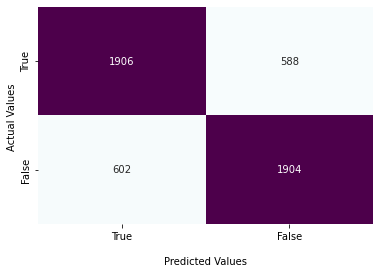

In [29]:
import seaborn as sns
ax = sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g', cbar=False)
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

In [30]:
accuracy_score(true_labels, pred_labels)

0.762